   No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir
0   1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW   1.79   0   0
1   2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW   4.92   0   0
2   3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW   6.71   0   0
3   4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW   9.84   0   0
4   5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW  12.97   0   0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non

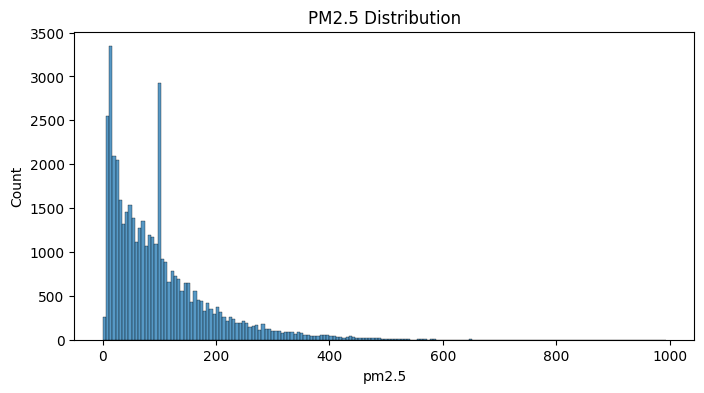

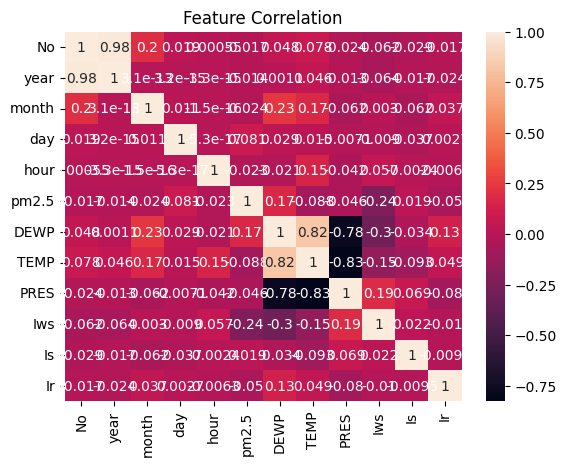

Train and test sets created.
Clean dataset saved as data/clean_pollution_data.csv.


In [4]:
# Week 1 - Dataset Preparation

# ## Introduction
# This notebook prepares air pollution data for PM2.5 prediction.
# Raw data is stored in `data/your_dataset.csv`.
# Cleaned data will be saved as `data/clean_pollution_data.csv` for use in Week 2.

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ### Load Data
raw_path = 'data/your_dataset.csv'

if not os.path.exists(raw_path):
    print("Raw dataset not found. Please place 'your_dataset.csv' inside the 'data/' folder.")
else:
    df = pd.read_csv(raw_path)

    # ### Quick View
    print(df.head())
    print(df.info())

    # ### Data Cleaning
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

    # ### Feature Engineering
    # 'hour' and 'month' columns already exist in the DataFrame, so no need to extract them.
    # If you want to create a datetime column for future use:
    df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

    # ### EDA
    plt.figure(figsize=(8,4))
    sns.histplot(df['pm2.5'])
    plt.title('PM2.5 Distribution')
    plt.show()

    # Only use numeric columns for correlation
    sns.heatmap(df[numeric_cols].corr(), annot=True)
    plt.title('Feature Correlation')
    plt.show()

    # ### Train/Test Split
    from sklearn.model_selection import train_test_split

    # Use existing numeric columns for features
    X = df[['TEMP', 'hour', 'month']]
    y = df['pm2.5']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    print("Train and test sets created.")

    # ### Save Cleaned Data
    clean_path = 'data/clean_pollution_data.csv'
    df.to_csv(clean_path, index=False)
    print(f"Clean dataset saved as {clean_path}.")